In [3]:
# set up working directory
import os
os.chdir('/Users/gaetanpinon/code_projects/hackathon_BioxAI/biohack')
# check working directory
os.getcwd()
print(os.getcwd())


# load dataset commercial_nac65.csv and nacc_processed.csv from data/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load dataset
# df2 = pd.read_csv('data/nacc/commercial_nacc65.csv')
df = pd.read_csv('data/nacc/nacc_processed.csv')

/Users/gaetanpinon/code_projects/hackathon_BioxAI/biohack


/var/folders/d7/k100c7y9141ckwg6_stkvkf40000gn/T/ipykernel_36018/2900523625.py:19: DtypeWarning: Columns (2,42,98) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/nacc/nacc_processed.csv')


In [4]:
# show everything when printing
pd.set_option('display.max_columns', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Explore nacc_processed.csv

In [5]:
# explore df
display(df.head())

# summary df
print(df.info())

# print all columns names, show all even if there are many, avoid the ...
print(list(df.columns))

# number of columns and rows
print(df.shape)

# summary statistics
print(df.describe())

,NACCADC,NACCID,NACCNIHR,MEMANTINE,DONEPEZIL,RIVASTIGMINE,GALANTAMINE,VISIT,SEX,NACCNRYR,EDUC,INDEPEND,INLIVWTH,NACCFAM,NACCAM,NACCFFTD,NACCAMD,NACCAHTN,NACCHTNC,NACCACEI,NACCAAAS,NACCBETA,NACCCCBS,NACCDIUR,NACCVASD,NACCANGI,NACCLIPL,NACCNSD,NACCAC,NACCADEP,NACCAPSY,NACCAANX,NACCPDMD,NACCEMD,NACCDBMD,SMOKYRS,CVHATT,CBSTROKE,CBTIA,PD,TBI,DIABETES,HYPERTEN,HYPERCHO,B12DEF,THYROID,ARTHRIT,ALCOHOL,ABUSOTHR,PTSD,BIPOLAR,SCHIZ,DEPOTHR,ANXIETY,OCD,NPSYDEV,NACCBMI,BPSYS,VISION,HEARING,SOMATIC,EMOT,HXHYPER,FOCLSIGN,HACHIN,CVDCOG,CVDIMAG1,PDNORMAL,CDRGLOB,MEMORY,ORIENT,JUDGMENT,CDRSUM,COMPORT,CDRLANG,DELSEV,HALLSEV,AGITSEV,DEPDSEV,ANXSEV,ELATSEV,APASEV,DISNSEV,IRRSEV,MOTSEV,NITESEV,APPSEV,NORMEXAM,ALSFIND,DECCLIN,COGMODE,MOMODE,NACCMMSE,NACCMOCA,COGSTAT,NACCUDSD,AMYLCSF,CSFTAU,EPILEP,SEIZURES,HIV,OTHCOG,DEP,NACCGDS,BIPOLDX,SCHIZOP,ANXIET,DELIR,PTSDDX,OTHPSY,ALCDEM,DYSILL,MEDS,FAQ,SLEEP,BPSYS_Missing,FAQ_Missing,NACCBMI_Missing,NACCGDS_Missing,NACCMMSE_Missing,NACCMOCA_Missing,SMOKYRS_Missing,AGITSEV_Missing,ANXSEV_Missing,APASEV_Missing,APPSEV_Missing,CDRLANG_Missing,COGSTAT_Missing,COMPORT_Missing,DELSEV_Missing,DEPDSEV_Missing,DISNSEV_Missing,EDUC_Missing,ELATSEV_Missing,HALLSEV_Missing,INDEPEND_Missing,IRRSEV_Missing,MOMODE_Missing,MOTSEV_Missing,NITESEV_Missing,HACHIN_Missing
0,186,NACC003487,1.0,0,0,0,0,66.955023,0,8888.0,16.0,1.0,1.0,0.0,Missing,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.7,149.0,Missing,1.0,Missing,Missing,Missing,Missing,0.721736,Missing,Missing,Missing,0.0,0.0,0.0,0.0,0.0,0.0,0.5,-0.238433,0.135697,-0.334292,-0.249217,-0.294399,0.062749,0.048845,0.288738,-1.192688,0.609719,-0.450954,-0.495254,0.0,0.0,Missing,0.0,0.0,25.336679,23.0,2.0,1.0,Missing,Missing,0.0,0.0,0.0,0.0,0,1.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,1.0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,1,1,0,1,1,0,1,0,1,1,1
1,186,NACC004687,1.0,0,0,0,0,77.785616,0,8888.0,12.0,1.0,0.0,Missing,Missing,0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,148.0,0.0,0.0,Missing,Missing,Missing,Missing,0.500327,Missing,Missing,Missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,Missing,0.0,0.0,32.223336,29.0,2.0,1.0,Missing,Missing,0.0,0.0,0.0,0.0,0,1.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,186,NACC008514,1.0,1,0,1,0,86.371689,0,8888.0,20.0,1.0,1.0,0.0,Missing,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.9,117.0,0.0,0.0,Missing,Missing,Missing,Missing,1.026312,Missing,Missing,Missing,0.5,0.5,0.0,0.5,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,Missing,1.0,1.0,27.507362,14.0,4.0,4.0,Missing,Missing,0.0,0.0,0.0,0.0,0,4.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,2.5,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,186,NACC008514,1.0,0,0,1,0,87.468721,0,8888.0,20.0,3.0,1.0,0.0,Missing,0,8.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.141515,Missing,Missing,Missing,Missing,Missing,0.0,1.0,Missing,Missing,0.0,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,27.8,152.0,0.0,0.0,Missing,Missing,Missing,Missing,1.934489,Missing,Missing,Missing,0.5,1.0,0.5,0.5,3.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.0,Missing,1.0,1.0,26.533596,17.0,4.0,4.0,Missing,Missing,0.0,Missing,0.0,0.0,0,1.890801,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,2.9,1.0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,186,NACC013204,1.0,0,0,0,0,74.016438,0,8888.0,18.0,1.0,1.0,0.0,Missing,0,6.0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154023 entries, 0 to 154022
Columns: 141 entries, NACCADC to HACHIN_Missing
dtypes: float64(36), int64(55), object(50)
memory usage: 165.7+ MB
None
['NACCADC', 'NACCID', 'NACCNIHR', 'MEMANTINE', 'DONEPEZIL', 'RIVASTIGMINE', 'GALANTAMINE', 'VISIT', 'SEX', 'NACCNRYR', 'EDUC', 'INDEPEND', 'INLIVWTH', 'NACCFAM', 'NACCAM', 'NACCFFTD', 'NACCAMD', 'NACCAHTN', 'NACCHTNC', 'NACCACEI', 'NACCAAAS', 'NACCBETA', 'NACCCCBS', 'NACCDIUR', 'NACCVASD', 'NACCANGI', 'NACCLIPL', 'NACCNSD', 'NACCAC', 'NACCADEP', 'NACCAPSY', 'NACCAANX', 'NACCPDMD', 'NACCEMD', 'NACCDBMD', 'SMOKYRS', 'CVHATT', 'CBSTROKE', 'CBTIA', 'PD', 'TBI', 'DIABETES', 'HYPERTEN', 'HYPERCHO', 'B12DEF', 'THYROID', 'ARTHRIT', 'ALCOHOL', 'ABUSOTHR', 'PTSD', 'BIPOLAR', 'SCHIZ', 'DEPOTHR', 'ANXIETY', 'OCD', 'NPSYDEV', 'NACCBMI', 'BPSYS', 'VISION', 'HEARING', 'SOMATIC', 'EMOT', 'HXHYPER', 'FOCLSIGN', 'HACHIN', 'CVDCOG', 'CVDIMAG1', 'PDNORMAL', 'CDRGLOB', 'MEMORY', 'ORIENT', 'JUDGMENT', 'CDRSUM', '

In [6]:
# check how many distinct values in column 'NACCID'
print(df['NACCID'].nunique())

43169


In [7]:
# Percentage of missing values in CDRSUM
cdrsum_missing_percentage = df['CDRSUM'].isnull().mean() * 100
print(f"Percentage of missing values in CDRSUM: {cdrsum_missing_percentage:.2f}%")

# Percentage of missing values in CDRGLOB
cdrglob_missing_percentage = df['CDRGLOB'].isnull().mean() * 100
print(f"Percentage of missing values in CDRGLOB: {cdrglob_missing_percentage:.2f}%")

Percentage of missing values in CDRSUM: 0.00%
Percentage of missing values in CDRGLOB: 0.00%


In [8]:
# Percentage of zeros in CDRSUM
cdrsum_zeros_percentage = (df['CDRSUM'] == 0).mean() * 100
print(f"Percentage of zeros in CDRSUM: {cdrsum_zeros_percentage:.2f}%")

# Percentage of zeros in CDRGLOB
cdrglob_zeros_percentage = (df['CDRGLOB'] == 0).mean() * 100
print(f"Percentage of zeros in CDRGLOB: {cdrglob_zeros_percentage:.2f}%")

Percentage of zeros in CDRSUM: 46.71%
Percentage of zeros in CDRGLOB: 48.69%


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='CDRSUM', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of CDRSUM')

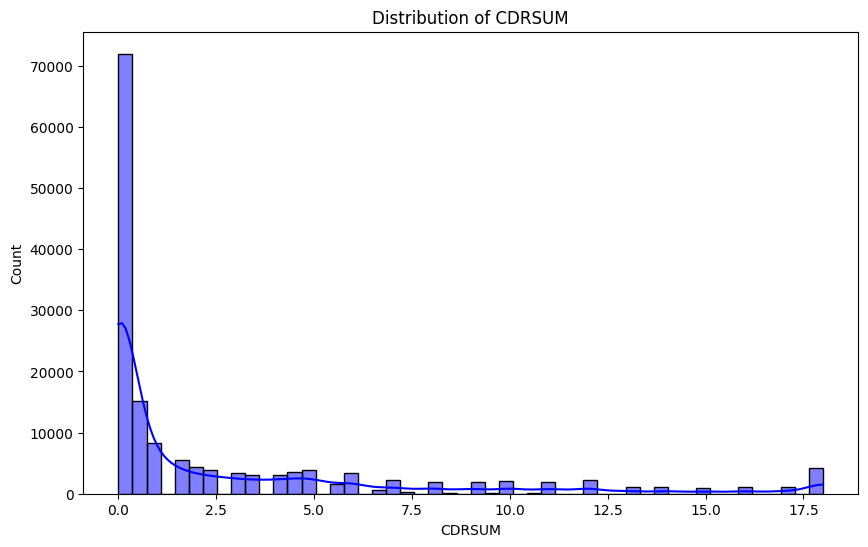

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='CDRGLOB', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of CDRGLOB')

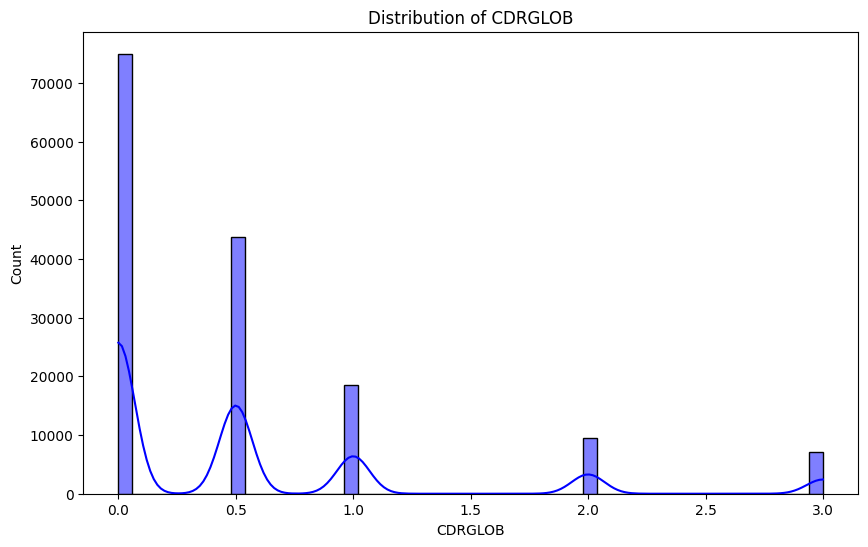

In [9]:
# show distrib of CDRSUM and CDRGLOB
plt.figure(figsize=(10, 6))
sns.histplot(df['CDRSUM'], bins=50, kde=True, color='blue')
plt.title('Distribution of CDRSUM')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['CDRGLOB'], bins=50, kde=True, color='blue')
plt.title('Distribution of CDRGLOB')
plt.show()

# Processing